In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [27]:
df = pd.read_csv("../dataset/cleaned/cleaned_reviews.csv")
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one other reviewers has mentioned after watchi...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there s family where little boy jake...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love time money visually stunn...


In [28]:
X = df["clean_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

len(X_train), len(X_test)


(40000, 10000)

In [29]:
tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


MODEL 1 — LOGISTIC REGRESSION

In [30]:
log_reg = LogisticRegression(max_iter=200, n_jobs=-1)
log_reg.fit(X_train_vec, y_train)

log_preds = log_reg.predict(X_test_vec)
log_acc = accuracy_score(y_test, log_preds)

print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 0.8996


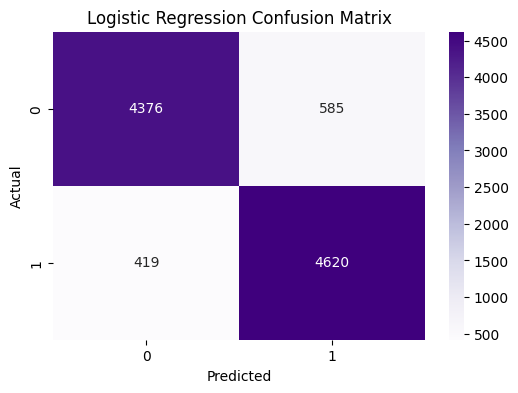

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [31]:
cm = confusion_matrix(y_test, log_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, log_preds))


MODEL 2 — SVM (LinearSVC)

In [32]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

svm_preds = svm.predict(X_test_vec)
svm_acc = accuracy_score(y_test, svm_preds)

print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.8985


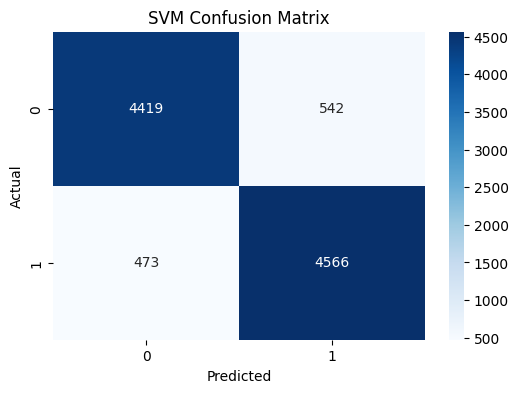

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [33]:
cm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, svm_preds))


MODEL 3 — KNN

In [34]:
k_values = [1, 3, 5, 7, 9]
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vec, y_train)
    preds = knn.predict(X_test_vec)

    score = accuracy_score(y_test, preds)
    knn_scores.append(score)
    print(f"K = {k} → Accuracy = {score:.4f}")


K = 1 → Accuracy = 0.7430
K = 3 → Accuracy = 0.7671
K = 5 → Accuracy = 0.7766
K = 7 → Accuracy = 0.7814
K = 9 → Accuracy = 0.7824


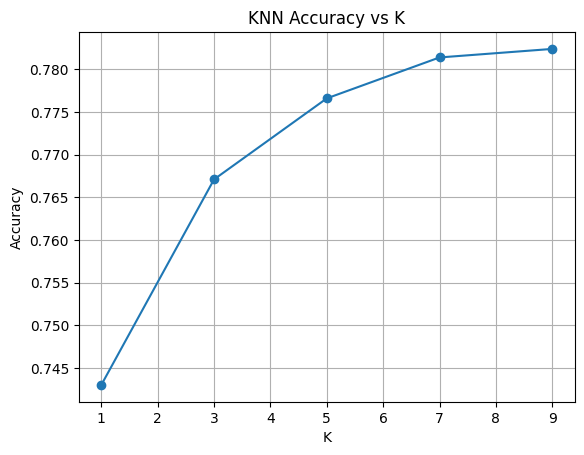

Best K: 9


In [35]:
plt.plot(k_values, knn_scores, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[knn_scores.index(max(knn_scores))]
print("Best K:", best_k)


In [36]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_vec, y_train)

knn_preds = knn.predict(X_test_vec)
knn_acc = accuracy_score(y_test, knn_preds)

print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.7824


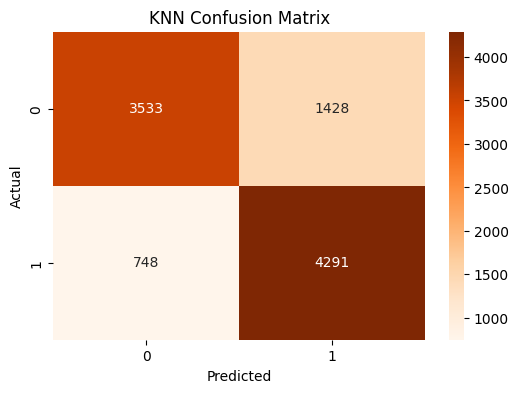

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      4961
           1       0.75      0.85      0.80      5039

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [37]:
cm = confusion_matrix(y_test, knn_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, knn_preds))


In [43]:
# 4. KNN experiment for over/underfitting
# -----------------------------
k_values = [1, 3, 5,9,50]
train_scores = []
test_scores = []

print("KNN Results (Train vs Test Accuracy):\n")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vec, y_train)

    # Train accuracy
    train_pred = knn.predict(X_train_vec)
    train_acc = accuracy_score(y_train, train_pred)

    # Test accuracy
    test_pred = knn.predict(X_test_vec)
    test_acc = accuracy_score(y_test, test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f"K = {k} → Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")


KNN Results (Train vs Test Accuracy):

K = 1 → Train Accuracy = 1.0000 | Test Accuracy = 0.7430
K = 3 → Train Accuracy = 0.8790 | Test Accuracy = 0.7671
K = 5 → Train Accuracy = 0.8524 | Test Accuracy = 0.7766
K = 9 → Train Accuracy = 0.8310 | Test Accuracy = 0.7824
K = 50 → Train Accuracy = 0.8216 | Test Accuracy = 0.8015


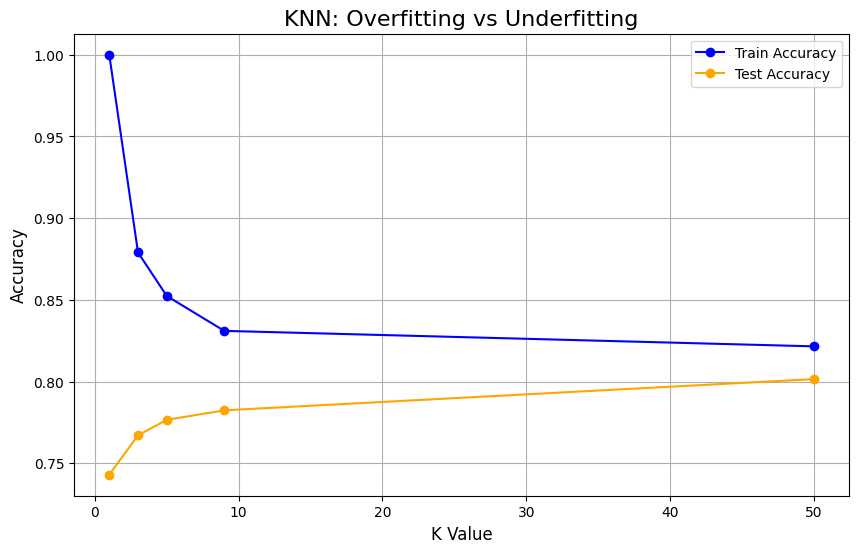


Best K based on test accuracy: 50


In [44]:
# 5. Plot train vs test accuracy
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(k_values, train_scores, marker='o', label="Train Accuracy", color="blue")
plt.plot(k_values, test_scores, marker='o', label="Test Accuracy", color="orange")

plt.title("KNN: Overfitting vs Underfitting", fontsize=16)
plt.xlabel("K Value", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 6. Identify best K
# -----------------------------
best_k = k_values[test_scores.index(max(test_scores))]
print("\nBest K based on test accuracy:", best_k)

MODEL COMPARISON

In [38]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "KNN"],
    "Accuracy": [log_acc, svm_acc, knn_acc]
})

results


,Model,Accuracy
0,Logistic Regression,0.8996
1,SVM,0.8985
2,KNN,0.7824


/var/folders/wr/5x3xw27s1b5_lg8hmkjg1wsm0000gn/T/ipykernel_14749/372379218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")


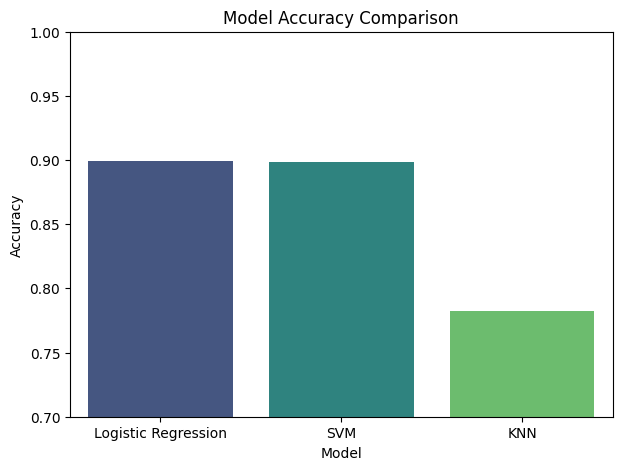

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(data=results, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0.70, 1.0)
plt.show()


SAMPLE PREDICTIONS

In [21]:
sample = ["The movie was great"]
sample_vec = tfidf.transform(sample)

print("Logistic:", log_reg.predict(sample_vec)[0])
print("SVM:", svm.predict(sample_vec)[0])
print("KNN:", knn.predict(sample_vec)[0])


Logistic: 1
SVM: 1
KNN: 1


In [22]:
pickle.dump(log_reg, open("../models/final_model.pkl", "wb"))
pickle.dump(tfidf, open("../models/tfidf.pkl", "wb"))

print("Model + TFIDF saved!")


Model + TFIDF saved!


In [25]:
sample = ["The movie was good"]
vec = tfidf.transform(sample)
print("Prediction:", log_reg.predict(vec)[0])


Prediction: 1
